<a href="https://colab.research.google.com/github/JuniaBS/Bootcamp-Data-Analytics./blob/main/7_Desafio5SquadMaryJackson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

# Definindo uma configuração personalizada para a exibição de dados
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
url = "https://raw.githubusercontent.com/dsreliete/Womakerscode-DA-desafio_squad/refs/heads/main/desafio_01_preco_imoveis.csv"
df = pd.read_csv(url)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00000,3,2.50000,1530,1131,3.00000,0,0,3,8,1530,0,2009,0,98103,47.69930,-122.34600
21609,6600060120,20150223T000000,400000.00000,4,2.50000,2310,5813,2.00000,0,0,3,8,2310,0,2014,0,98146,47.51070,-122.36200
21610,1523300141,20140623T000000,402101.00000,2,0.75000,1020,1350,2.00000,0,0,3,7,1020,0,2009,0,98144,47.59440,-122.29900
21611,291310100,20150116T000000,400000.00000,3,2.50000,1600,2388,2.00000,0,0,3,8,1600,0,2004,0,98027,47.53450,-122.06900


# **Desafio Análise de Correlação:**

Suponha que você trabalha em uma empresa do setor imobiliário. Para essa empresa é muito importante precificar corretamente o imóvel, caso contrário, os corretores podem perder a venda. Como parte do time de dados, você é responsável por analisar os principais fatores que podem afetar o preço dos imóveis. Para isso, eles te enviaram a base de dados (desafio_01_preco_imoveis.csv). Como você poderia ajudá-los?


1 - Analise a correlação de todas as variáveis com o preço do imóvel. Quais variáveis são mais correlacionadas? Quais são menos correlacionadas?

In [ ]:
# Convertendo a coluna 'date' para o tipo datetime, para garantir que a coluna de data seja interpretada corretamente pelo pandas
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

In [ ]:
# Calculando a correlação entre todas as variáveis do DataFrame
corr = df.corr()

# Gerando um mapa de calor para visualizar as correlações entre as variáveis
corr.style.background_gradient(cmap='coolwarm')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.000000,0.005577,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799
date,0.005577,1.000000,-0.004357,-0.016800,-0.034410,-0.034559,0.006313,-0.022491,0.001356,-0.001800,-0.050769,-0.039912,-0.027924,-0.019469,-0.000355,-0.024509,0.001404,-0.032856,-0.007020
price,-0.016762,-0.004357,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626
bedrooms,0.001286,-0.016800,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473
bathrooms,0.005160,-0.034410,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042
sqft_living,-0.012258,-0.034559,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223
sqft_lot,-0.132109,0.006313,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521
floors,0.018525,-0.022491,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419
waterfront,-0.002721,0.001356,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910
view,0.011592,-0.001800,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400


In [ ]:
# Ordenando os valores de correlação da variável 'price' de forma decrescente
corr["price"].sort_values(ascending = False)

,price
price,1.00000
sqft_living,0.70204
grade,0.66743
sqft_above,0.60557
bathrooms,0.52514
view,0.39729
sqft_basement,0.32382
bedrooms,0.30835
lat,0.30700
waterfront,0.26637


## Resultados da análise:
As 5 variáveis mais correlacionadas positivamente com o preço do imóvel são:

* sqft_living, (área útil do imóvel)
* grade, (qualidade do design e construção)
* sqft_above, (área útil acima do solo)
* bathrooms, (número de banheiros)
* view. (vista que o imóvel oferece)

As 5 variáveis menos correlacionadas com o preço são:

* id (identificação única do imóvel)
* zipcode (código postal)
* long (longitude)
* condition (condição do imóvel)
* yr_built (ano de construção)

## Conclusão
Na matriz de correlação acima, podemos identificar, por meio do mapa de calor, as variáveis mais correlacionadas, as menos correlacionadas e as neutras.

* **Correlação positiva**: Quanto mais próximo de 1, mais forte é a correlação positiva, o que é indicado pela cor vermelha. Isso significa que as variáveis aumentam juntas. Um exemplo é a correlação entre sqft_living e sqft_above.

* **Correlação neutra**: Valores próximos de 0 indicam pouca ou nenhuma correlação, representados pela cor branca. Um exemplo disso é a relação entre zipcode e lat, onde praticamente não há impacto entre essas variáveis.

* **Correlação negativa**: Valores próximos de -1 indicam uma correlação negativa, mostrada pela cor azul escura, o que significa que uma variável tende a diminuir à medida que a outra aumenta. Um exemplo disso é a correlação entre condition e yr_built.

2 - Para as top 5 variáveis mais correlacionadas com o preço:
1. plote as suas distribuições (histograma e boxplot)


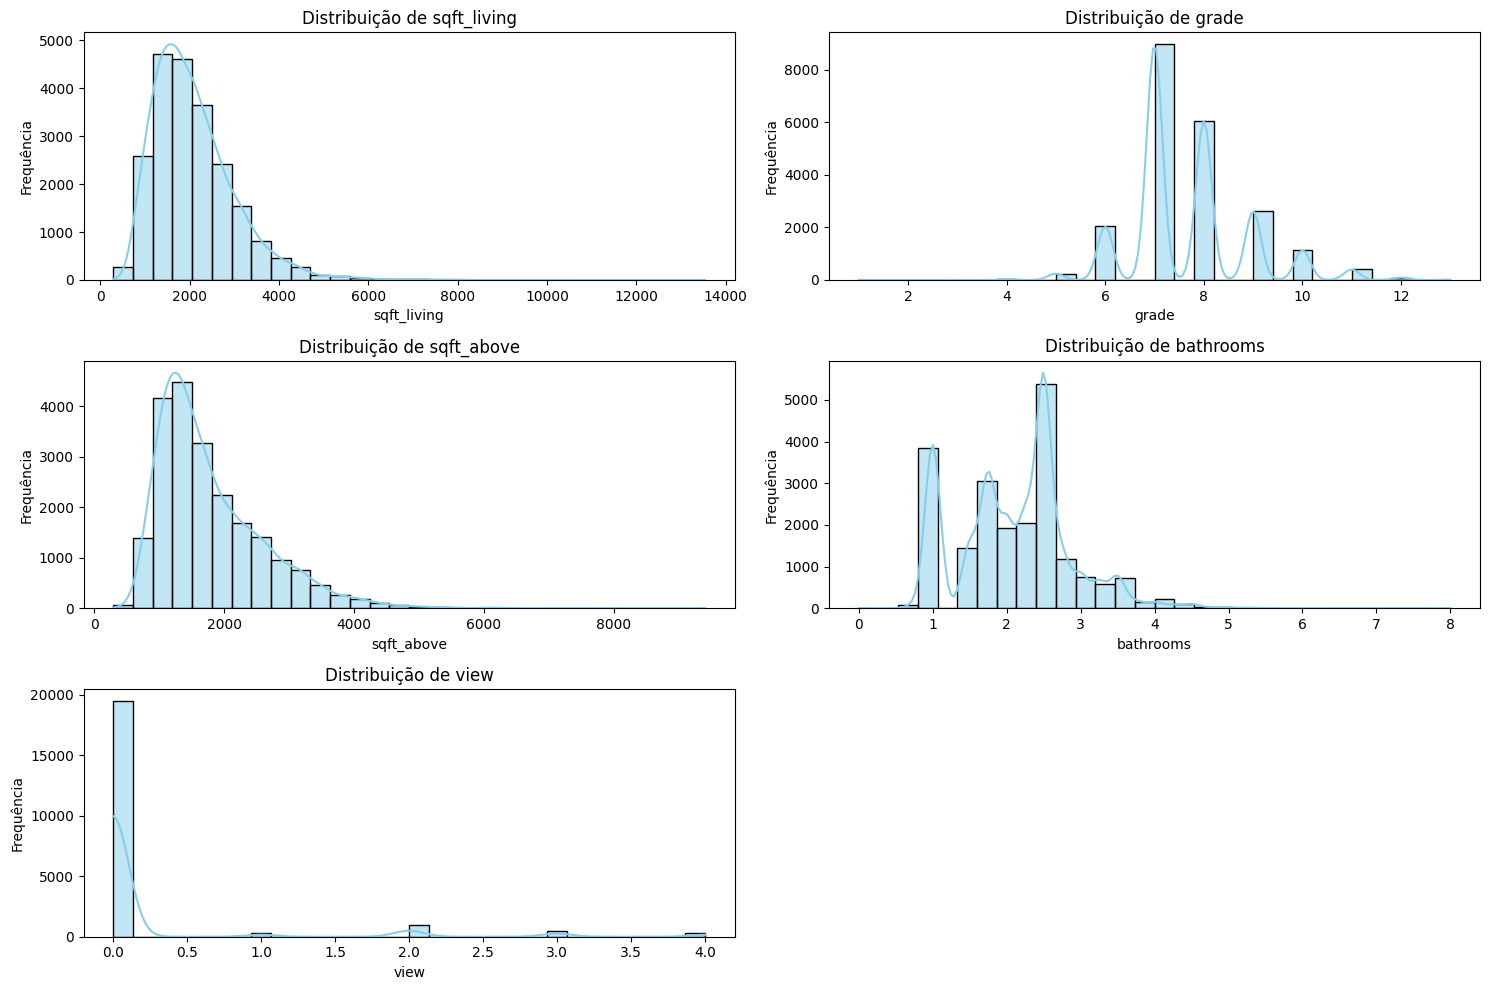

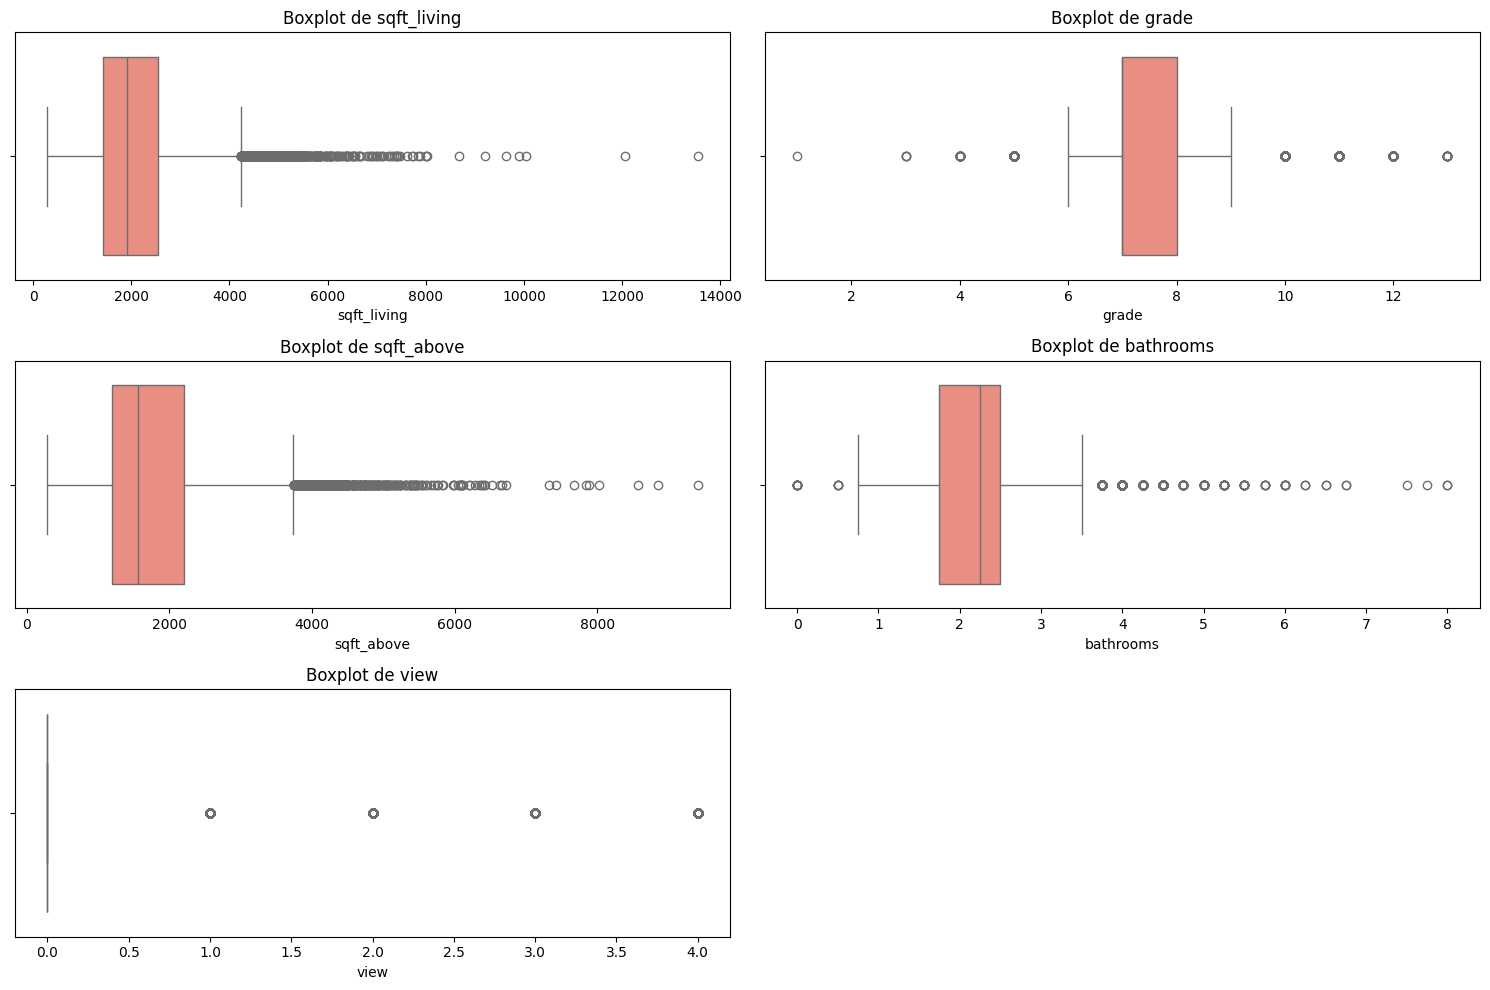

In [ ]:
# Convertendo a coluna 'date' para o tipo datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

# Calculando a correlação
corr = df.corr()

# Top 5 variáveis mais correlacionadas com o preço
top_variables = corr['price'].nlargest(6).index[1:]  # Exclui o 'price' da lista

# Configuração para os plots
plt.figure(figsize=(15, 10))

for i, var in enumerate(top_variables):
    plt.subplot(3, 2, i + 1)

    # Histograma
    sns.histplot(df[var], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))

for i, var in enumerate(top_variables):
    plt.subplot(3, 2, i + 1)

    # Boxplot
    sns.boxplot(x=df[var], color='salmon')
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()



2. plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a variável correlacionada no eixo X.


['price', 'sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view']


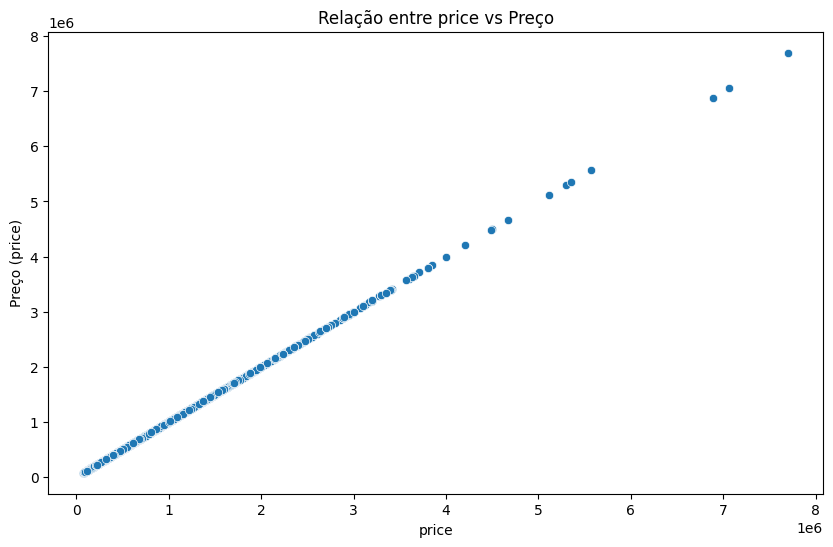

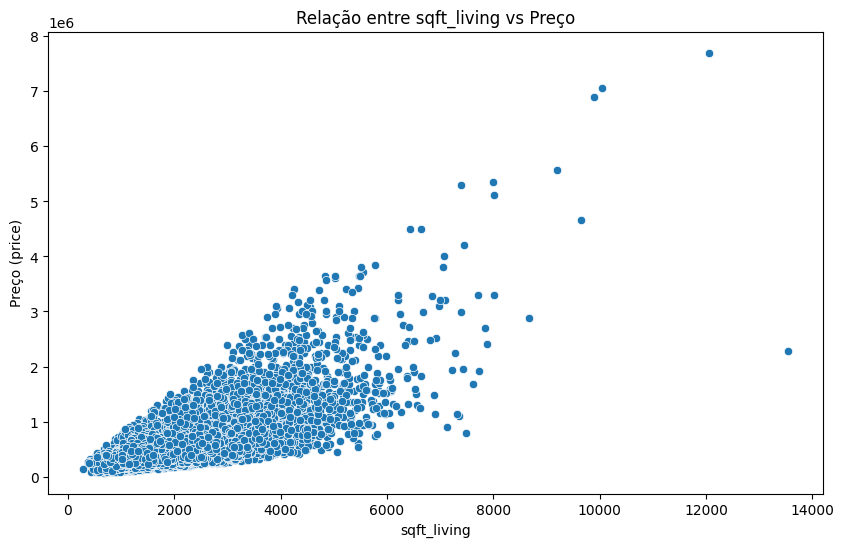

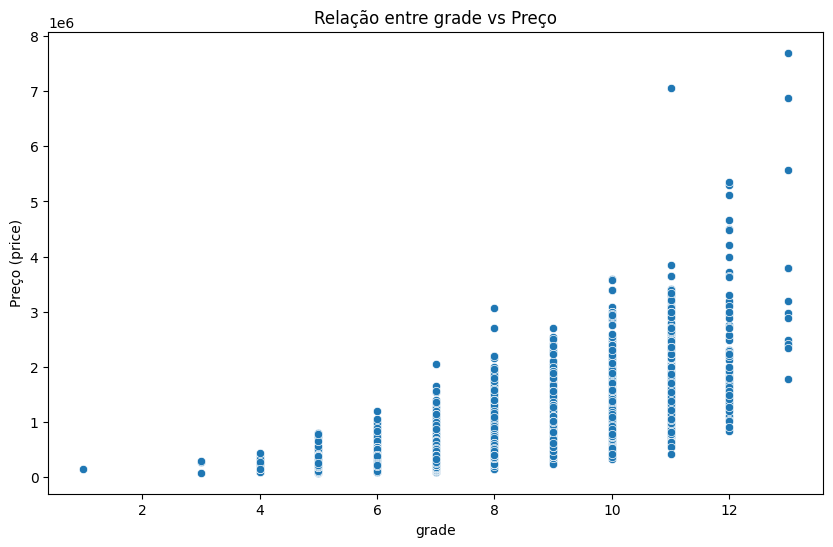

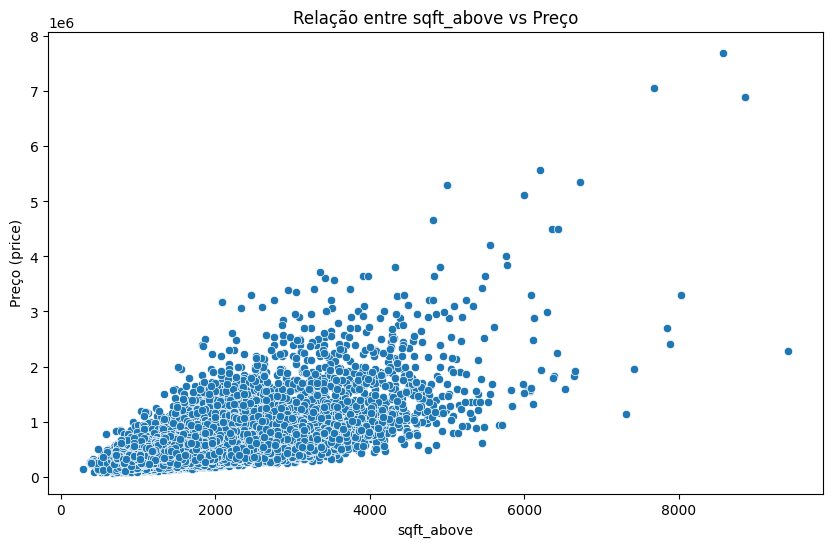

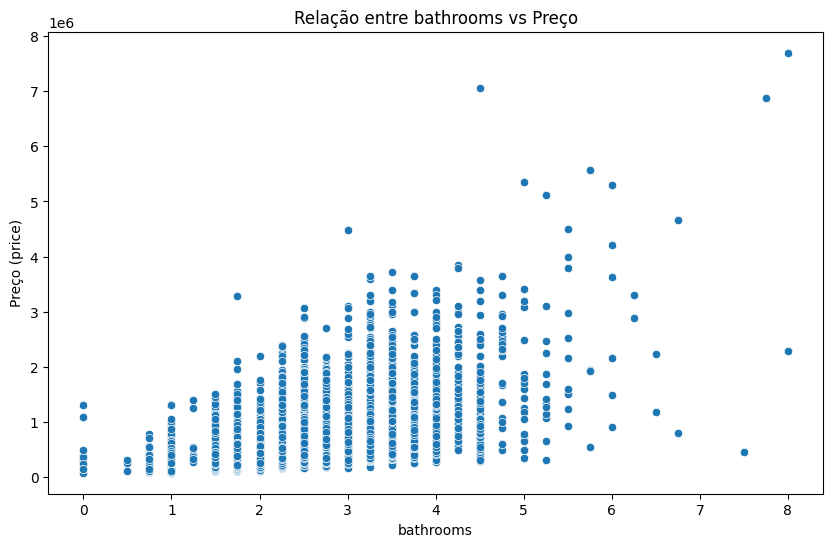

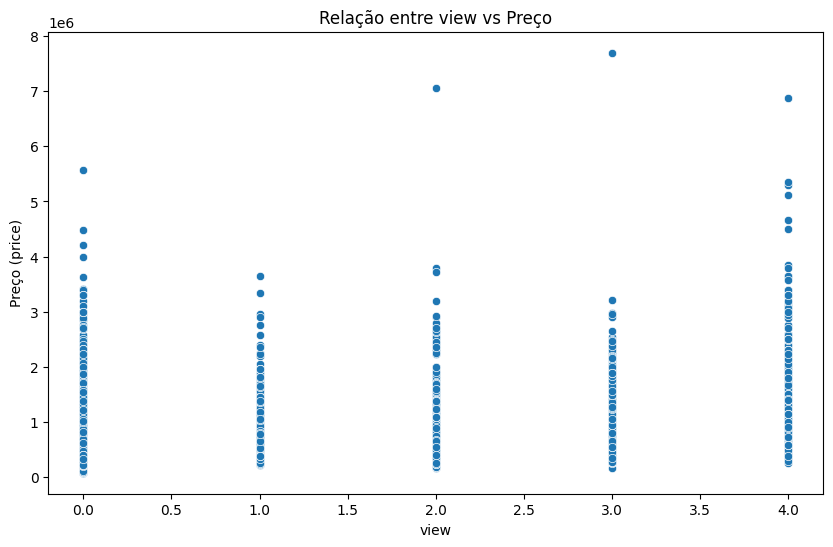

In [ ]:
# Seleciona as colunas de interesse do DataFrame original 'df' e cria um novo DataFrame 'df_top_cinco' com essas colunas
df_top_cinco = df[['price', 'sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view']]

# Obtém a lista das colunas numéricas (inclui 'price' e as 5 variáveis selecionadas)
numeric_columns = df_top_cinco.select_dtypes(include=['number']).columns.tolist()
print(numeric_columns)

# Para cada coluna numérica, cria um gráfico de dispersão mostrando a relação com o preço
for col in numeric_columns:
  plt.figure(figsize=(10,6))
  sns.scatterplot(data=df_top_cinco, x=col, y='price')
  plt.xlabel(col)
  plt.ylabel('Preço (price)')
  plt.title(f'Relação entre {col} vs Preço')
  plt.show()

3. para cada uma das 5 variáveis faça uma regressão linear simples sendo preciso a variável resposta (y) e interprete os resultados.

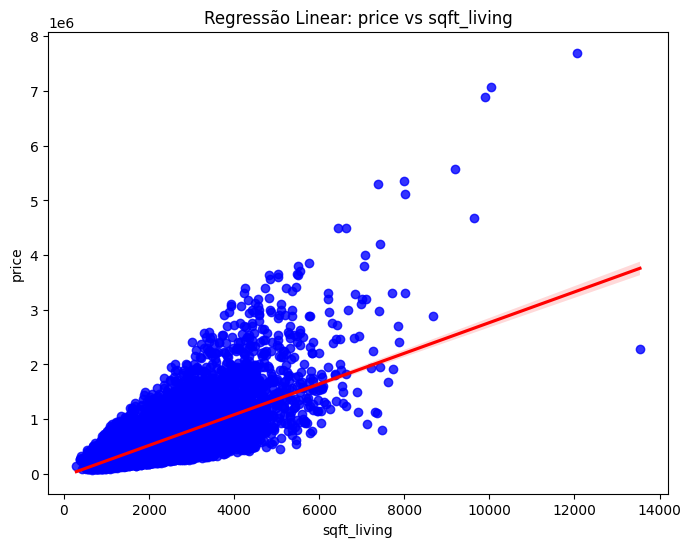

Entende-se que a correlação é True pois o valor é de: 0.7020350546118005 


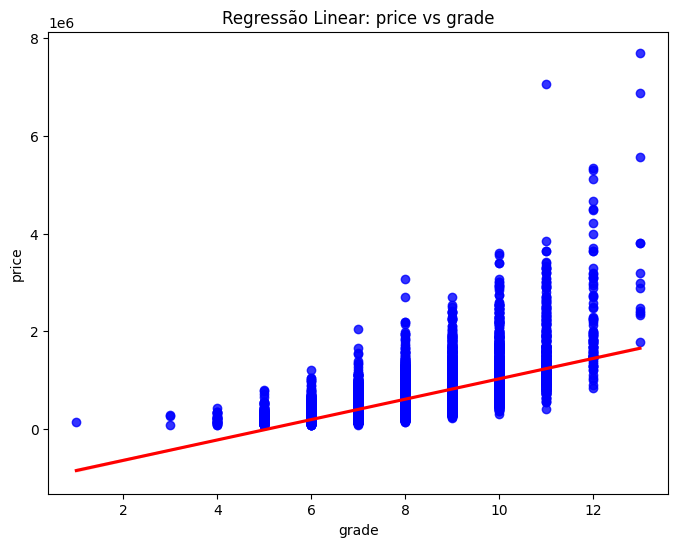

Entende-se que a correlação é True pois o valor é de: 0.6674342560202353 


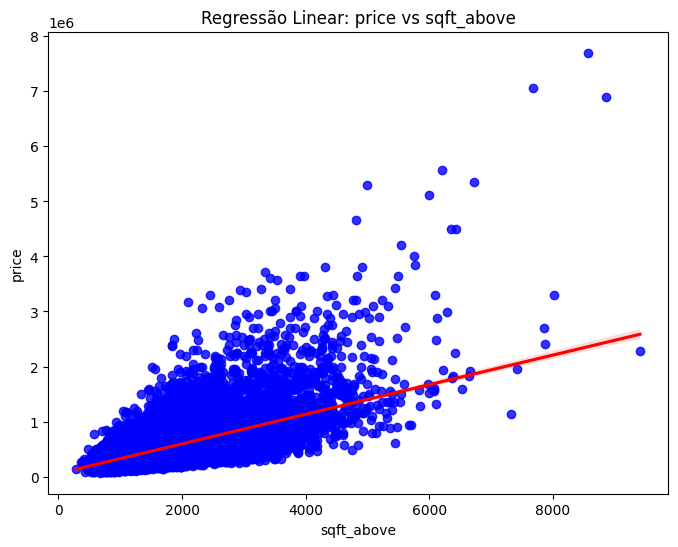

Entende-se que a correlação é True pois o valor é de: 0.6055672983560784 


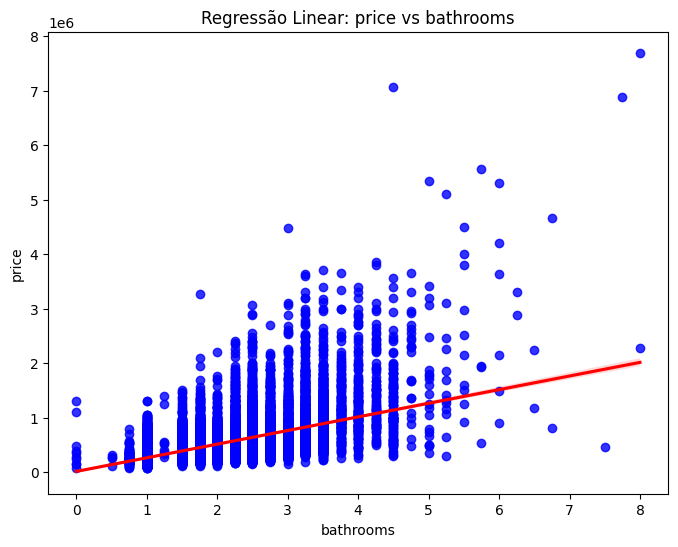

Entende-se que a correlação é True pois o valor é de: 0.5251375054139628 


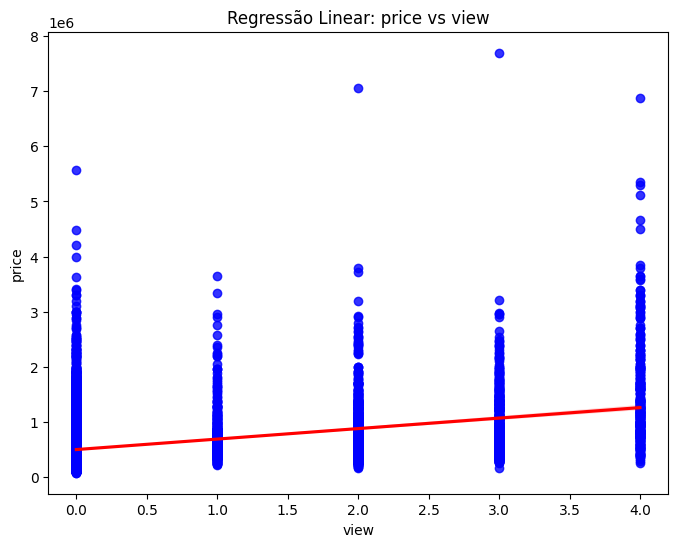

Entende-se que a correlação é True pois o valor é de: 0.39729348829450273 


In [ ]:
numeric_variables = df.select_dtypes(include='number')

# Calcular a matriz de correlação
matriz = numeric_variables.corr()

# Selecionar as variáveis mais correlacionadas com o preço
price_corr = matriz['price']
mais_correlaciona = price_corr.abs().nlargest(6)
top_cinco_corr = mais_correlaciona.drop('price')
top_cinco_corr_df = top_cinco_corr.reset_index()
top_cinco_corr_df.columns = ['variável', 'correlação']

# Loop para criar gráficos e interpretar a correlação
for index, row in top_cinco_corr_df.iterrows():
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df[row['variável']], y=df['price'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f'Regressão Linear: price vs {row["variável"]}')
    plt.xlabel(row['variável'])
    plt.ylabel('price')
    plt.show()
    va =  row['correlação']
    corr = False
    if row['correlação'] > 0:
      corr = True

    print(f'Entende-se que a correlação é {corr} pois o valor é de: {va} ')